# Data Challenge: Breast Cancer Detection

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Step 1: importing and cleaning data

In [3]:
# loading data

path = 'C:/Users/Huajun/Desktop/DataChallenge/'
file = 'breast-cancer-wisconsin.txt'
data = pd.read_table(os.path.join(path, file), sep = ",")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15855 entries, 0 to 15854
Data columns (total 12 columns):
Index                          15855 non-null int64
ID                             15855 non-null int64
Clump Thickness                15855 non-null int64
Uniformity of Cell Size        15827 non-null object
Uniformity of Cell Shape       15827 non-null object
Marginal Adhesion              15827 non-null object
Single Epithelial Cell Size    15827 non-null object
Bare Nuclei                    15827 non-null object
Bland Chromatin                15827 non-null object
Normal Nucleoli                15827 non-null object
Mitoses                        15827 non-null object
Class                          15827 non-null object
dtypes: int64(3), object(9)
memory usage: 1.5+ MB


In [4]:
# Check unique observations and drop duplicate records

print(len(data['ID'].unique()))
data.drop_duplicates(subset = 'ID', keep = 'first', inplace = True)
data.shape

666


(666, 12)

In [5]:
# check the distribution of outcome variable

data['Class'].value_counts()

2     409
4     234
40     17
20      5
?       1
Name: Class, dtype: int64

In [6]:
# define functions to convert strings into integers values for non-numeric features

def convert_class(value):
    """convert Class variable into benign vs. malignant"""
    if value == '4':
        return 0
    elif value == '2':
        return 1
    else:
        return None


def convert_int(value):
    """convert str values into int values"""
    if value.isdigit():
        return int(value)
    else:
        return None

In [7]:
# apply above functions to process features

data['malignant'] = data['Class'].apply(convert_class)
data = data.dropna()

data['breast cell'] = np.where(data['malignant'] == 1,
                         'Malignant', 'Benign')

columns = ['Uniformity of Cell Shape', 'Uniformity of Cell Size', 'Marginal Adhesion', \
     'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', \
     'Normal Nucleoli', 'Mitoses']

for label in columns:
    data[label] = data[label].apply(convert_int)   

In [8]:
# final data shape

data = data.dropna()
data.shape

(627, 14)

## Step 2: EDA and visualization

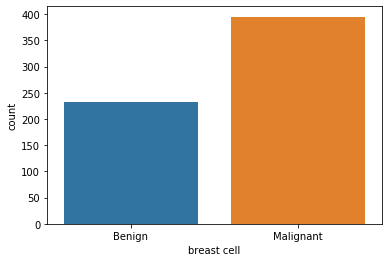

In [9]:
# plotting the distribution of the outcome

sns.countplot(data['breast cell'], label = "Count")

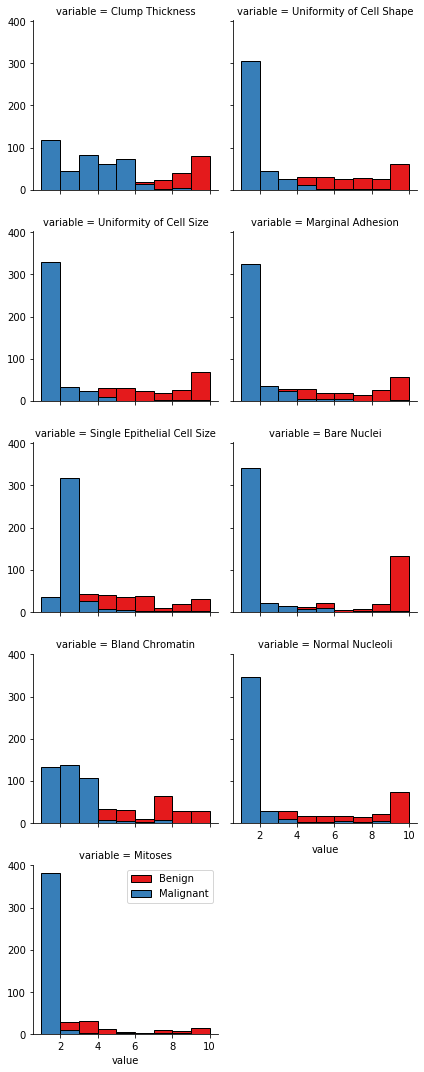

In [10]:
# plot the distribution of each feature by outcome classes

features = ['Clump Thickness', 'Uniformity of Cell Shape', 'Uniformity of Cell Size', \
            'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', \
            'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']
   
dshort = data[features]
dshort['breast cell'] = data['breast cell']
df = pd.melt(dshort, id_vars = 'breast cell', \
             value_vars = features, value_name = 'value')

bins=np.linspace(df.value.min(), df.value.max(), 10)
g = sns.FacetGrid(df, col='variable', hue='breast cell', palette="Set1", col_wrap=2)
g.map(plt.hist, 'value', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

The above distribution shows a consistent pattern that the values of different features of a malignant cell are mostly concentrated towards the lower end while the values of a benign cell are distributed more evenly across the range of [1,10].

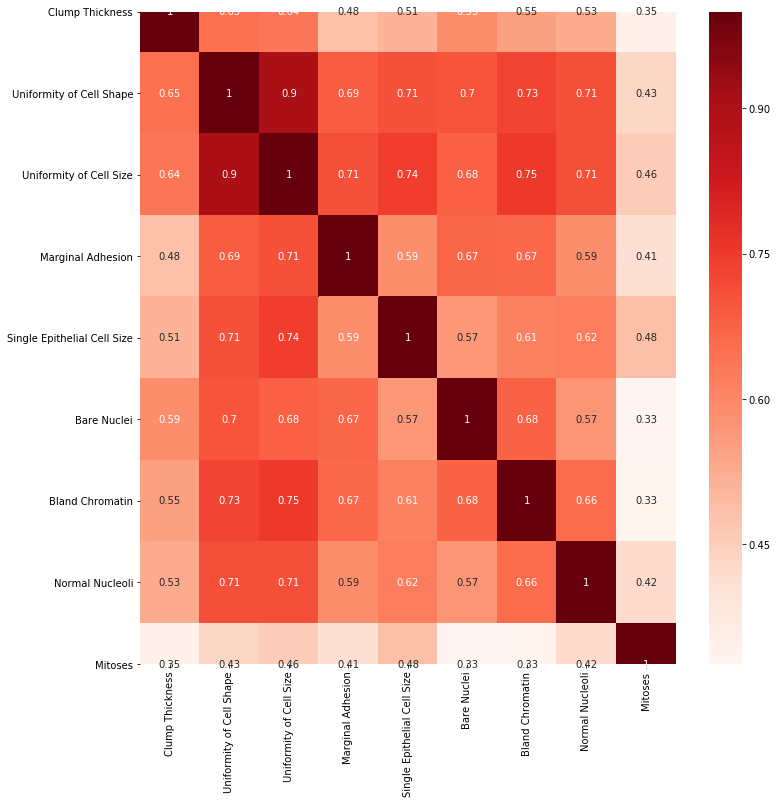

In [11]:
# visualize the correlation among features

plt.figure(figsize=(12,12))
cor = dshort.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Step 3: Test different classifier models to classify breast cell as benign vs. malignant

In [12]:
# split train/test set and scale features for models

X = data[features]
Y = data[['malignant']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# define a function to try different classification models

def models(X_train,Y_train):
    """function to fit different classifiers
    and print model accuracy score on the training data"""
    
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
      
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)
    
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)
    
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
      
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
      
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [14]:
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.9720558882235529
[1]K Nearest Neighbor Training Accuracy: 0.9780439121756487
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9720558882235529
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9780439121756487
[4]Gaussian Naive Bayes Training Accuracy: 0.9660678642714571
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9960079840319361


In [15]:
# metrics for all models above on the test data

for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
      
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
      
    print('Model[{}] Confusion Matrix is:'.format(i))
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i, (TP + TN) / (TP + TN + FN + FP)))
    print(classification_report(Y_test, model[i].predict(X_test)))
    print()

Model[0] Confusion Matrix is:
[[40  3]
 [ 2 81]]
Model[0] Testing Accuracy = "0.9603174603174603"
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        43
         1.0       0.96      0.98      0.97        83

    accuracy                           0.96       126
   macro avg       0.96      0.95      0.96       126
weighted avg       0.96      0.96      0.96       126


Model[1] Confusion Matrix is:
[[39  4]
 [ 2 81]]
Model[1] Testing Accuracy = "0.9523809523809523"
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93        43
         1.0       0.95      0.98      0.96        83

    accuracy                           0.95       126
   macro avg       0.95      0.94      0.95       126
weighted avg       0.95      0.95      0.95       126


Model[2] Confusion Matrix is:
[[40  3]
 [ 2 81]]
Model[2] Testing Accuracy = "0.9603174603174603"
              precision    recall  f1-score   supp

Metrics show close performance across different classifiers. Decide to use random forest classifier to move forward because 1) it gives us estimates on feature importances; and 2) it has relatively good performance metric on both the training and test data.

## Step 4: Use Random Forest Classifier to predict benign vs. malignant breast cells

[0.10232259 0.21959306 0.09895946 0.05073115 0.24645385 0.06049404
 0.18137844 0.02631888 0.01374851]


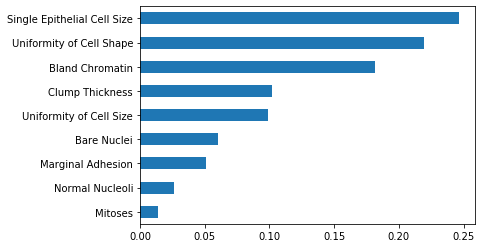

In [16]:
# fit random forest classifier and visualize feature importances

forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)
print(forest.feature_importances_)
feat_importances = pd.Series(forest.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values()
feat_importances.plot(kind='barh')
plt.show()

In [17]:
# print out model metrics on test data

cm = confusion_matrix(Y_test, forest.predict(X_test))
print(cm)
print(classification_report(Y_test, forest.predict(X_test)))
print(accuracy_score(Y_test, forest.predict(X_test)))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
print('False Positive Rate = "{}"'.format(FPR))
print('False Negative Rate = "{}"'.format(FNR))

[[42  1]
 [ 2 81]]
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97        43
         1.0       0.99      0.98      0.98        83

    accuracy                           0.98       126
   macro avg       0.97      0.98      0.97       126
weighted avg       0.98      0.98      0.98       126

0.9761904761904762
False Positive Rate = "0.023255813953488372"
False Negative Rate = "0.024096385542168676"


In [18]:
# test out how each feature contributes to False Positive Rate (FPR) and False Negative Rate (FNR)

FPR_list = []
FNR_list = []
removed_list = []

for i in range(len(features)):
    new_features = features[:]
    removed_list.append(new_features[i])
    new_features.remove(new_features[i])
    
    X = data[new_features]
    Y = data[['malignant']]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,\
                                                    random_state = 0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    cm = confusion_matrix(Y_test, forest.predict(X_test))      
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
    FPR = FP / (FP + TN)
    FNR = FN / (FN + TP)
    FPR_list.append(FPR)
    FNR_list.append(FNR)

result = pd.DataFrame(columns = ['removed feature', 'FPR', 'FNR'])
result['removed feature'] = removed_list
result['FPR'] = FPR_list
result['FNR'] = FNR_list
result

,removed feature,FPR,FNR
0,Clump Thickness,0.046512,0.024096
1,Uniformity of Cell Shape,0.023256,0.024096
2,Uniformity of Cell Size,0.023256,0.036145
3,Marginal Adhesion,0.000000,0.024096
4,Single Epithelial Cell Size,0.023256,0.024096
5,Bare Nuclei,0.000000,0.036145
6,Bland Chromatin,0.046512,0.036145
7,Normal Nucleoli,0.046512,0.024096
8,Mitoses,0.000000,0.012048


## Conclusion

The following answers from the data challenge descriptions can be concluded from the above analyses.

1. What features of a cell are the largest drivers of malignancy? 
-Single epithelial cell size.

2. What features drive your false positive rate for your model you derived above, what features drive your false negative rate? 
-Clump thickness, bland chromatin, and normal nucleoli are the three features driving the false positive rate.
-Uniformity of cell size, bare nuclei, and bland chromatin are the three features driving the false negative rate.

3. How would a physician use your product?
-My product builds a well-performing classfier model that when you input the key features of a breast cell, it gives you an over 97% accurate prediction on whether this cell is malignant or benign. It saves physicians time and effort trying to manually make predictions on breast cancer.

4. There is a non-zero cost in time and money to collect each feature about a given cell. How would you go about determining the most cost-effective method of detecting malignancy?
-Given the feature importance as well as different key features driving the false positive rate and false negative rate in breast cancer detection, I would recommend to at least keep collecting data on the following 3 features about a given cell: Single epithelial cell size, uniformity of cell size, and bland chromatin.